In [2]:
# chatbot - Chatting, RAG, Tools, UI, Langsmith

In [3]:
from langgraph.graph import StateGraph, START, END
from langchain_community.chat_models import ChatOllama
from langchain_openai import ChatOpenAI
from typing import TypedDict, Literal, Annotated
from langchain_core.messages import SystemMessage, HumanMessage, BaseMessage


In [4]:
#model = ChatOllama(model="llama3")

In [5]:
from langgraph.graph.message import add_messages
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [6]:
llm = ChatOpenAI(model='gpt-4o')


def chat_node(state: ChatState):

    # take user query from state
    messages = state['messages']

    # send to llm
    response = llm.invoke(messages)

    # response store state
    return {'messages': [response]}

In [7]:
graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile()

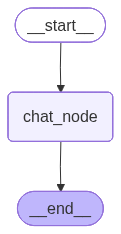

In [8]:
chatbot

In [9]:
initial_state = {
    'messages': [HumanMessage(content='What is the capital of india')]
}

chatbot.invoke(initial_state)['messages'][-1].content

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [10]:
while True:
    user_message =input('Type here: ')
    print('User:', user_message)
    if user_message.strip().lower() in ['exit','quit', 'bye']:
        break
    response = chatbot.invoke({'messages':[HumanMessage(content=user_message)]})
    print('AI:', response['messages'][-1].content)

User: hi


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}